# **Anallyzer AI**

### Membros do grupo:

- Vitor Kubica - RM: 98903
- Nicholas Santos - RM: 551809
- Eduardo Violante - RM: 550364
- Pedro Pacheco - RM: 98043
- Beatriz Svestka - RM: 551534


### **Funcionamento da IA**
Estamos usando o algoritmo K-Nearest Neighbors (KNN) para identificar e classificar as melhorias nas campanhas de e-mail marketing. Por exemplo, se nos primeiros 7 dias a campanha teve 3000 aberturas e no dia 30 ela aumentou para 4000 tivemos uma melhora bem baixa de mil aberturas em mais de 20 dias, a IA nos ajuda a identificar e mostrar isso pro cliente.

### **Framewors/Bibliotecas Python utilizados**
- Pandas
- Matplotlib
- ScikitLearn
- Seaborn
- KNN (K-Nearest-Neighbor)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv('dataset_campanhas.csv', sep=',')

In [4]:
df

,Cliques_7d,Aberturas_7d,Envios_7d,Leads_7d,Cliques_30d,Aberturas_30d,Envios_30d,Leads_30d
0,202,517,3901,74,266,901,5755,115
1,448,876,2686,42,594,803,4659,89
2,370,424,4009,49,362,362,4575,60
3,206,433,4710,83,308,605,5080,116
4,171,883,1154,52,314,1013,2089,65
...,...,...,...,...,...,...,...,...
195,332,522,3738,22,319,826,4642,25
196,358,885,4498,55,422,1130,5747,59
197,458,991,2636,44,422,1310,3712,86
198,297,825,2291,15,438,906,3230,11


In [5]:
df.columns

Index(['Cliques_7d', 'Aberturas_7d', 'Envios_7d', 'Leads_7d', 'Cliques_30d',
       'Aberturas_30d', 'Envios_30d', 'Leads_30d'],
      dtype='object')

In [6]:
df.shape

(200, 8)

In [7]:
df['Melhoria'] = (
    ((df['Cliques_30d'] > df['Cliques_7d'] * 1.1).astype(int) +
     (df['Aberturas_30d'] > df['Aberturas_7d'] * 1.1).astype(int) +
     (df['Leads_30d'] > df['Leads_7d'] * 1.1).astype(int)) >= 2
).astype(int)

In [8]:
X = df.drop('Melhoria', axis=1)
y = df['Melhoria']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn.predict(X_test_scaled)

In [13]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [14]:
print("Acurácia:", accuracy_score(y_test, y_pred)*100)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 72.5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.33      0.10      0.15        10
           1       0.76      0.93      0.84        30

    accuracy                           0.73        40
   macro avg       0.55      0.52      0.49        40
weighted avg       0.65      0.72      0.67        40



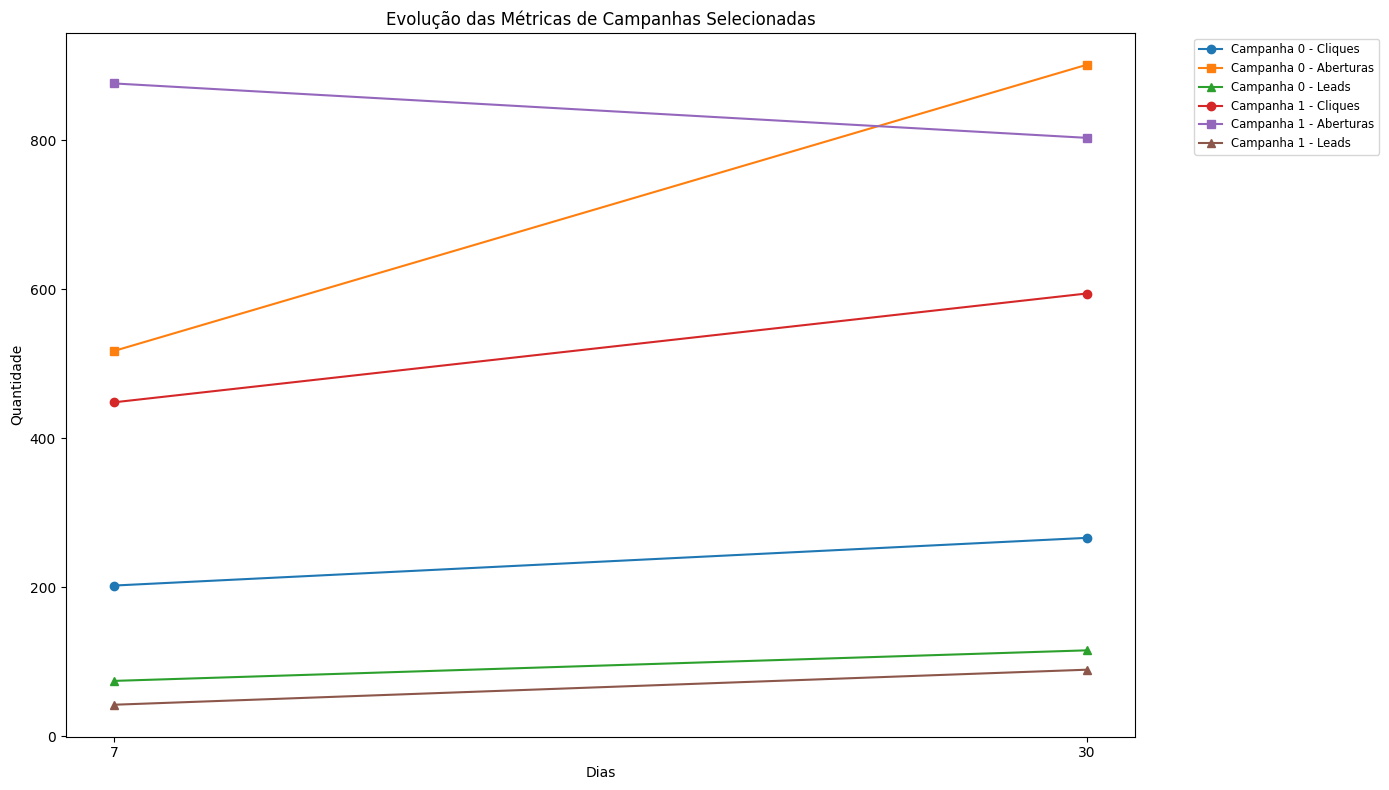

In [15]:
campanhas_selecionadas = df.iloc[:2]

plt.figure(figsize=(14, 8))

for index, campanha in campanhas_selecionadas.iterrows():
    dias = [7, 30]
    cliques = [campanha['Cliques_7d'], campanha['Cliques_30d']]
    aberturas = [campanha['Aberturas_7d'], campanha['Aberturas_30d']]
    leads = [campanha['Leads_7d'], campanha['Leads_30d']]
    
    plt.plot(dias, cliques, marker='o', label=f'Campanha {index} - Cliques')
    plt.plot(dias, aberturas, marker='s', label=f'Campanha {index} - Aberturas')
    plt.plot(dias, leads, marker='^', label=f'Campanha {index} - Leads')

plt.xlabel('Dias')
plt.ylabel('Quantidade')
plt.title('Evolução das Métricas de Campanhas Selecionadas')
plt.xticks(dias)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()